# DEMO


### Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import os
import geocoder
import mysql.connector
import time
import matplotlib.pyplot as plt
from IPython.display import clear_output
from sklearn.neighbors import KNeighborsClassifier

from sklearn import preprocessing
import sys,os
import random
import torch

#from sklearn.model_selection import train_test_split


ORIGIN_PATH = os.getcwd()

### Defining Utility functions and classes

In [2]:
def getSubjectNum(fileName) :
        import re
        n = re.findall(r'\d+', fileName)
        return int(n[0])


In [3]:
class acceleration_chest_X :
     id =0
     name = 'acceleration_chest_X'

class acceleration_chest_Y :
     id =1
     name = 'acceleration_chest_Y'

class acceleration_chest_Z :
     id =2
     name = 'acceleration_chest_Z'

class ECG_lead_1 :
     id=3
     name = 'ECG_lead_1'

class ECG_lead_2 :
     id=4
     name = 'ECG_lead_2'

class acceleration_left_ankle_X :
     id =5
     name = 'acceleration_left_ankle_X'

class acceleration_left_ankle_Y :
     id =6
     name = 'acceleration_left_ankle_Y'

class acceleration_left_ankle_Z :
     id =7
     name = 'acceleration_left_ankle_Z'

class gyro_left_ankle_X :
     id =8
     name = 'gyro_left_ankle_X'

class gyro_left_ankle_Y :
     id =9
     name = 'gyro_left_ankle_Y'

class gyro_left_ankle_Z :
     id =10
     name = 'gyro_left_ankle_Z'

class magnetometer_left_ankle_X :
     id =11
     name = 'magnetometer_left_ankle_X'

class magnetometer_left_ankle_Y :
     id =12
     name = 'magnetometer_left_ankle_Y'

class magnetometer_left_ankle_Z :
     id =13
     name = 'magnetometer_left_ankle_Z'

class acceleration_right_lower_arm_X :
    id =14
    name = 'acceleration_right_lower_arm_X'

class acceleration_right_lower_arm_Y :
    id =15
    name = 'acceleration_right_lower_arm_Y'

class acceleration_right_lower_arm_Z :
    id =16
    name = 'acceleration_right_lower_arm_Z'

class gyro_right_lower_arm_X :
    id =17
    name = 'gyro_right_lower_arm_X'

class gyro_right_lower_arm_Y :
    id =18
    name = 'gyro_right_lower_arm_Y'

class gyro_right_lower_arm_Z :
    id =19
    name = 'gyro_right_lower_arm_Z'

class magnetometer_right_lower_arm_X :
    id =20
    name = 'magnetometer_right_lower_arm_X'

class magnetometer_right_lower_arm_Y :
    id =21
    name = 'magnetometer_right_lower_arm_Y'


class magnetometer_right_lower_arm_Z :
    id =22
    name = 'magnetometer_right_lower_arm_Z'
    

In [4]:
class mHealthModel:
    def __init__(self,TYPE,freq=50,sourceData="MHEALTHDATASET//mHealth_subject3.log"):
        self.frequency=freq
        self.sourceData=sourceData
        self.column=TYPE.id
        self.name=TYPE.name
        self.subjectNum=getSubjectNum(self.sourceData)
        self.model = KNeighborsClassifier(n_neighbors=1)
        self.X=None
        self.Y=None
        self.train()
        
    def train(self):
        X =  np.array([])
        Y =  np.array([])
        print("***********",self.sourceData,"*************")
        df = pd.read_csv(self.sourceData, header=None, delim_whitespace=True)
        df = df[df[23]!=0] #drop 0 labeled features
        readings_df = pd.DataFrame(df[self.column].copy())
        targets_df = pd.DataFrame(df[23].copy())
        reading_np = readings_df.values

        rps=self.frequency
        activities=[1,2,3,4,5,9,10,11]
        # #         segmentation
        for i in range(int(readings_df.shape[0]/rps)):
            if  float(targets_df[i*rps:i*rps+rps].mean()) in activities:
                Y=np.append(Y,targets_df[i*rps:i*rps+rps].mean()) #new
                X=np.append(X,readings_df[i*rps:i*rps+rps].values)

        X=X.reshape(-1,rps)
        OutDF = pd.DataFrame(X)
        OutDF['labels']=Y
        OutDF.reset_index
        OutDF.to_csv("self.name"+"_subject"+str(self.subjectNum), sep='\t',index=False)
        self.X=X
        self.Y=Y
        
        self.model.fit(self.X,self.Y)
        
        
    def predict(self,X):
        return self.model.predict(X)

In [5]:
class mHealthSensor:
    def __init__(self,TYPE,freq=50,sourceData="mHealth_subject3.log",realisitc=False):
        self.frequency=freq
        self.sourceData=sourceData
        self.column=TYPE.id
        self.name=TYPE.name
        self.realisitc=realisitc
        self.subjectNum=getSubjectNum(self.sourceData)
        self.generateInputFile()
        self.datapool=pd.DataFrame(np.array([]))
    
    def generateInputFile(self):
        if not os.path.isfile(self.name+"_subject"+str(self.subjectNum)):
            X =  np.array([])
            Y =  np.array([])
            df = pd.read_csv(self.sourceData, header=None, delim_whitespace=True)
            df = df[df[23]!=0] #drop 0 labeled features
            readings_df = pd.DataFrame(df[self.column].copy())
            targets_df = pd.DataFrame(df[23].copy())
            reading_np = readings_df.values

            rps=self.frequency
            activities=[1,2,3,4,5,9,10,11]

            # #         segmentation
            for i in range(int(readings_df.shape[0]/rps)):
                if  float(targets_df[i*rps:i*rps+rps].mean()) in activities:
                    Y=np.append(Y,targets_df[i*rps:i*rps+rps].mean()) #new
                    X=np.append(X,readings_df[i*rps:i*rps+rps].values)

            X=X.reshape(-1,rps)
            OutDF = pd.DataFrame(X)
            OutDF['labels']=Y
            OutDF.reset_index
            OutDF.to_csv(self.name+"_subject"+str(self.subjectNum), sep='\t',index=False)

    #returns value , target
    def getReading(self,activity=1):
        if self.realisitc:
            import time
            time.sleep(1)
        if self.datapool.empty == True:
            self.datapool= pd.read_csv(self.name+"_subject"+str(self.subjectNum), sep='\t',index_col=False)
        readings = self.datapool.loc[self.datapool.labels==activity,]
        randIndex = np.random.randint(0,len(readings))
        randIndex=0
        if(activity==9):
            randIndex=2
        return np.array(readings.iloc[randIndex,range(0,self.frequency)]), readings.iloc[randIndex,self.frequency]


In [6]:
ACTUATOR_BUFFER=[]
ECG_BUFFER=[]
os.chdir(ORIGIN_PATH)
source = os.path.join(ORIGIN_PATH,"MHEALTHDATASET","mHealth_subject3.log")
gyroSensor = mHealthSensor(TYPE=gyro_left_ankle_Z,freq=50,sourceData=source,realisitc=True)
ECGSensor  = mHealthSensor(TYPE=ECG_lead_1,freq=50,sourceData=source,realisitc=True)
ActuatorsPredictor = mHealthModel(TYPE=gyro_left_ankle_Z,freq=50,sourceData=source)
ECGPredictor = mHealthModel(TYPE=ECG_lead_1,freq=50,sourceData=source)


*********** D:\Y\eHealthNew\eHealth\MHEALTHDATASET\mHealth_subject3.log *************
*********** D:\Y\eHealthNew\eHealth\MHEALTHDATASET\mHealth_subject3.log *************


In [13]:
def sendEmrgency(patientID=38,description=""):
    cnx = mysql.connector.connect(user='root', password='',
                              host='localhost',
                              database='ehealth2')
    cursor = cnx.cursor()
    g = geocoder.ip('me')
    PatientID= patientID
    Latitude= g.latlng[0]
    Longitude= g.latlng[1]
    Description=description
    TimeOfOccurrence= time.strftime('%Y-%m-%d %H:%M:%S')
    Flag= 1
    query = "INSERT INTO `emergencycase` (`EmergencyCaseID`, `PatientID`, `Latitude`, `Longitude`,`Description` ,`TimeOfOccurrence`, `Flag`) VALUES (NULL, '"+str(PatientID)+"', '"+str(Latitude)+"', '"+str(Longitude)+"', '"+str(Description)+"', '"+str(TimeOfOccurrence)+"', '"+str(Flag)+"');"
    cursor.execute(query)
    cnx.close()
def sendECG(patientID,values):
    cnx = mysql.connector.connect(user='root', password='',
                              host='localhost',
                              database='ehealth2')
    cursor = cnx.cursor()
    PatientID= patientID
    for v in values:
        TimeOfOccurrence= time.strftime('%Y-%m-%d %H:%M:%S')
        query = "INSERT INTO `sensorreading` (`SensorReadingID`, `PatientID`, `HeartRate`, `Temperature`, `SPO2`, `ReadingTime`) VALUES (NULL, '"+str(PatientID)+"', '"+str(v)+"', '37.1', '95.7', '"+str(TimeOfOccurrence)+"')"
        cursor.execute(query)
    cnx.close()

In [8]:
import torch.nn as nn
import torch.nn.functional as F

In [9]:

#35
# define the CNN architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # convolutional layer (sees 144x32x4 image tensor)
        self.conv1 = nn.Conv2d(3, 8, 3, padding=1)

        # convolutional layer (sees 72x16x16 tensor)
        self.conv2 = nn.Conv2d(8, 16, 3, padding=1)
        
        # convolutional layer (sees 36x8x32 tensor)
        self.conv3 = nn.Conv2d(16, 32, 3, padding=1)
        # convolutional layer (sees 18x8x32 tensor)
        self.conv4 = nn.Conv2d(32, 64, 3, padding=1)
        # max pooling layer
        self.pool = nn.MaxPool2d(2, 2)
        self.pool1 = nn.MaxPool2d(3, 3)
        # linear layer (64 * 9 * 9 -> 500)
        self.fc1 = nn.Linear(64 * 9 * 9, 3500)
        # linear layer (500 -> 10)
        self.fc2 = nn.Linear(3500, 1500)
       # self.fc3 = nn.Linear(1500,700)
       # self.fc4 = nn.Linear(700, 300)
        self.fc3 = nn.Linear(1500, 700)
        self.fc4 = nn.Linear(700, 8)
        # dropout layer (p=0.25)
        self.dropout = nn.Dropout(0.2)

    def forward(self, x):
        # add sequence of convolutional and max pooling layers
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = self.pool(F.relu(self.conv4(x)))
        # flatten image input
        x = x.view(-1, 64 * 9 * 9)
        # add dropout layer
        #x = self.dropout(x)
        # add 1st hidden layer, with relu activation function
        x = F.relu(self.fc1(x))
        # add dropout layer
        x = self.dropout(x)
        # add 2nd hidden layer, with relu activation function
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = F.relu(self.fc3(x))
        x = self.dropout(x)
       # x = F.relu(self.fc4(x))
       # x = self.dropout(x)
        x = self.fc4(x)
        return x
# create a complete CNN
model = Net()
print(model)


Net(
  (conv1): Conv2d(3, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (pool1): MaxPool2d(kernel_size=3, stride=3, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=5184, out_features=3500, bias=True)
  (fc2): Linear(in_features=3500, out_features=1500, bias=True)
  (fc3): Linear(in_features=1500, out_features=700, bias=True)
  (fc4): Linear(in_features=700, out_features=8, bias=True)
  (dropout): Dropout(p=0.2)
)


In [10]:
import torch.optim as optim

# specify loss function (categorical cross-entropy)
criterion = nn.CrossEntropyLoss()

# specify optimizer
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [11]:
path = os.getcwd()
path = str(path)+"\model_augmented2.pt"


device = torch.device('cpu')
model = Net()
model.load_state_dict(torch.load(path, map_location=device))

## DEMO


Enter patient ID:
ID:38
[1] Normal behaviour
[2] Anomalous behaviour
Choice :2
What's the user actually doing now?
[1] Standing still
[2] Sitting and relaxing
[3] Lying down
[4] Walking
[5] Climbing stairs
[9] Cycling
[10] Jogging
[11] Running
current activity:10
reading gyroscope sensor
[-1.0432  -1.0432  -0.87033 -0.87033 -0.87033 -0.87033 -0.44597 -0.44597
 -0.44597 -0.37721 -0.37721 -0.37721 -0.37721 -0.75639 -0.75639 -0.75639
 -0.88998 -0.88998 -0.88998 -0.88998 -0.88998 -0.88998 -0.88998 -0.82122
 -0.82122 -0.82122 -0.93124 -0.93124 -0.93124 -0.93124 -0.82711 -0.82711
 -0.82711 -0.82318 -0.82318 -0.82318 -0.82318 -1.0255  -1.0255  -1.0255
 -0.99018 -0.99018 -0.99018 -0.58743 -0.58743 -0.58743 -0.58743 -0.27112
 -0.27112 -0.27112]
reading ecg sensor
activity2:5
[ 0.046049   0.037677   0.12559    0.23443    0.071167   0.041863
  0.066981   0.025118   0.84144    3.8137    -0.17582    0.016745
  0.0083726  0.037677   0.13396    0.17164    0.26374    0.35165
  0.45631    0.43956    0.

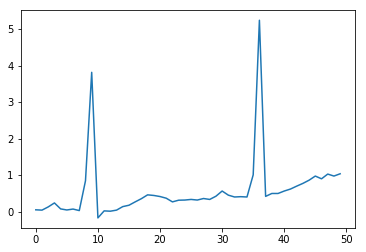

Activity Predicted (via ECG):  Climbing stairs
Activity Predicted (via GYR):  Jogging
ANOMALY
ECG readings indicates that the activity is Climbing stairs but Actuators are showing that the user is Jogging


In [14]:
labels=["Transition","Standing still","Sitting and relaxing","Lying down","Walking","Climbing stairs","Waist bends forward","Frontal elevation of arms","Knees bending (crouching)","Cycling","Jogging","Running","Jump front & back"]

from PIL import Image
import torchvision.transforms as transforms
import time
while(True):
    clear_output()
    print("Enter patient ID:")
    patientID=int(input("ID:"))
    print("[1] Normal behaviour")
    time.sleep(0.1)
    print("[2] Anomalous behaviour")
    time.sleep(0.1)
    behaviour = int(input("Choice :"))
    print("What's the user actually doing now?")
    time.sleep(0.1)
    print("[1] Standing still")
    time.sleep(0.1)
    print("[2] Sitting and relaxing")
    time.sleep(0.1)
    print("[3] Lying down")
    time.sleep(0.1)
    print("[4] Walking")
    time.sleep(0.1)
    print("[5] Climbing stairs")
    time.sleep(0.1)
#     print("[6] Waist bends forward")
    time.sleep(0.1)
#     print("[7] Frontal elevation of arms")
    time.sleep(0.1)
#     print("[8] Knees bending (crouching)")
    time.sleep(0.1)
    print("[9] Cycling")
    time.sleep(0.1)
    print("[10] Jogging")
    time.sleep(0.1)
    print("[11] Running")
    time.sleep(0.1)
#     print("[12] Jump front & back")
    time.sleep(0.1)
    activity=int(input("current activity:"))
    
    
    print("reading gyroscope sensor")
    time.sleep(0.5)
    actuator_reading,Activity_actual_GYR=gyroSensor.getReading(activity=activity)
    print(actuator_reading)
    
    print("reading ecg sensor")
    time.sleep(0.5)
    if behaviour == 1 :
        ecg_reading,Activity_actual_ECG=ECGSensor.getReading(activity=activity)
    else :
        activity2=int(input("activity2:"))
        ecg_reading,Activity_actual_ECG=ECGSensor.getReading(activity=activity2)
        #ecg_reading,Activity_actual_ECG=ECGSensor.getReading(activity=(activity+1)%12)
    print(ecg_reading)
    df = pd.DataFrame(ecg_reading)
    plt.plot(df)
    plt.show()
    
    

    data = np.array([])
    
    
    figsize=(2,2)
    plt.figure(figsize=figsize)
    plt.xticks([])
    plt.yticks([])
    plt.rc("figure", facecolor="white")
    for spine in plt.gca().spines.values():
        spine.set_visible(False)
    plt.plot(ecg_reading, color='k')
    label=str(Activity_actual_ECG)
    plt.savefig("test.jpg")
    plt.clf()
    plt.cla()
    plt.close()
    sendECG(patientID,ecg_reading)
    #path = os.getcwd()
    #path_str = os.path.join(str(path),"\\test.jpg")
    img = Image.open("test.jpg")
    
    
    preprocess = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])
    img_tensor = preprocess(img)
    img_tensor=img_tensor.reshape(-1,3,144,144)
    
    
    output = model(img_tensor)
    _, pred = torch.max(output, 1)    
    
    #Activity_actual_ECG    
    
    Nodes =['Jogging','Running','Standing still', 'Sitting and relaxing', 'Lying_down', 'Walking','Climbing stairs' ,'Cycling']   
    NodeActivity =[10,11,1,2,3,4,5,9] 
  
    Activity_predited_GYR = ActuatorsPredictor.predict(np.array(actuator_reading).reshape(1, -1))
    
    print("Activity Predicted (via ECG): ",Nodes[pred[0]])
    print("Activity Predicted (via GYR): ",labels[int(Activity_predited_GYR)])
    
    if(NodeActivity[pred[0]] == int(Activity_predited_GYR)):
        print("NORMAL BEHAVIOUR")
    else:
        msg = "ECG readings indicates that the activity is "+Nodes[pred[0]]+" but Actuators are showing that the user is " + labels[int(Activity_predited_GYR)] 

        #msg = "Actuators are showing that the user is " + labels[int(Activity_predited_GYR)] + " but ECG readings indicates that the activity is "+labels[int(Activity_predited_ECG)]
        print("ANOMALY")
        print(msg)
        sendEmrgency(patientID,msg)
#     input("[Press any key to continue]")
    break
